# Problem Statement
Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
R&D Spend -- Research and devolop spend in the past few years Administration -- spend on administration in the past few years Marketing Spend -- spend on Marketing in the past few years State -- states from which data is collected Profit -- profit of each state in the past few years

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=(250)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline


In [2]:
data = pd.read_csv('50_Startups (1).csv')

# EDA

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data=pd.get_dummies(data,columns=['State'])

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [6]:
data = data.rename(columns={'R&D Spend':'RnD_spend',
                      'Marketing Spend':'marketing_spend',
                     'State_New York':'State_new_york'})

In [7]:
data.head()

,RnD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_new_york
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [8]:
data.describe()

,RnD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_new_york
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RnD_spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   marketing_spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_new_york    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [10]:
data.shape

(50, 7)

In [11]:
data.corr()

,RnD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_new_york
RnD_spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
marketing_spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_new_york,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<AxesSubplot:>

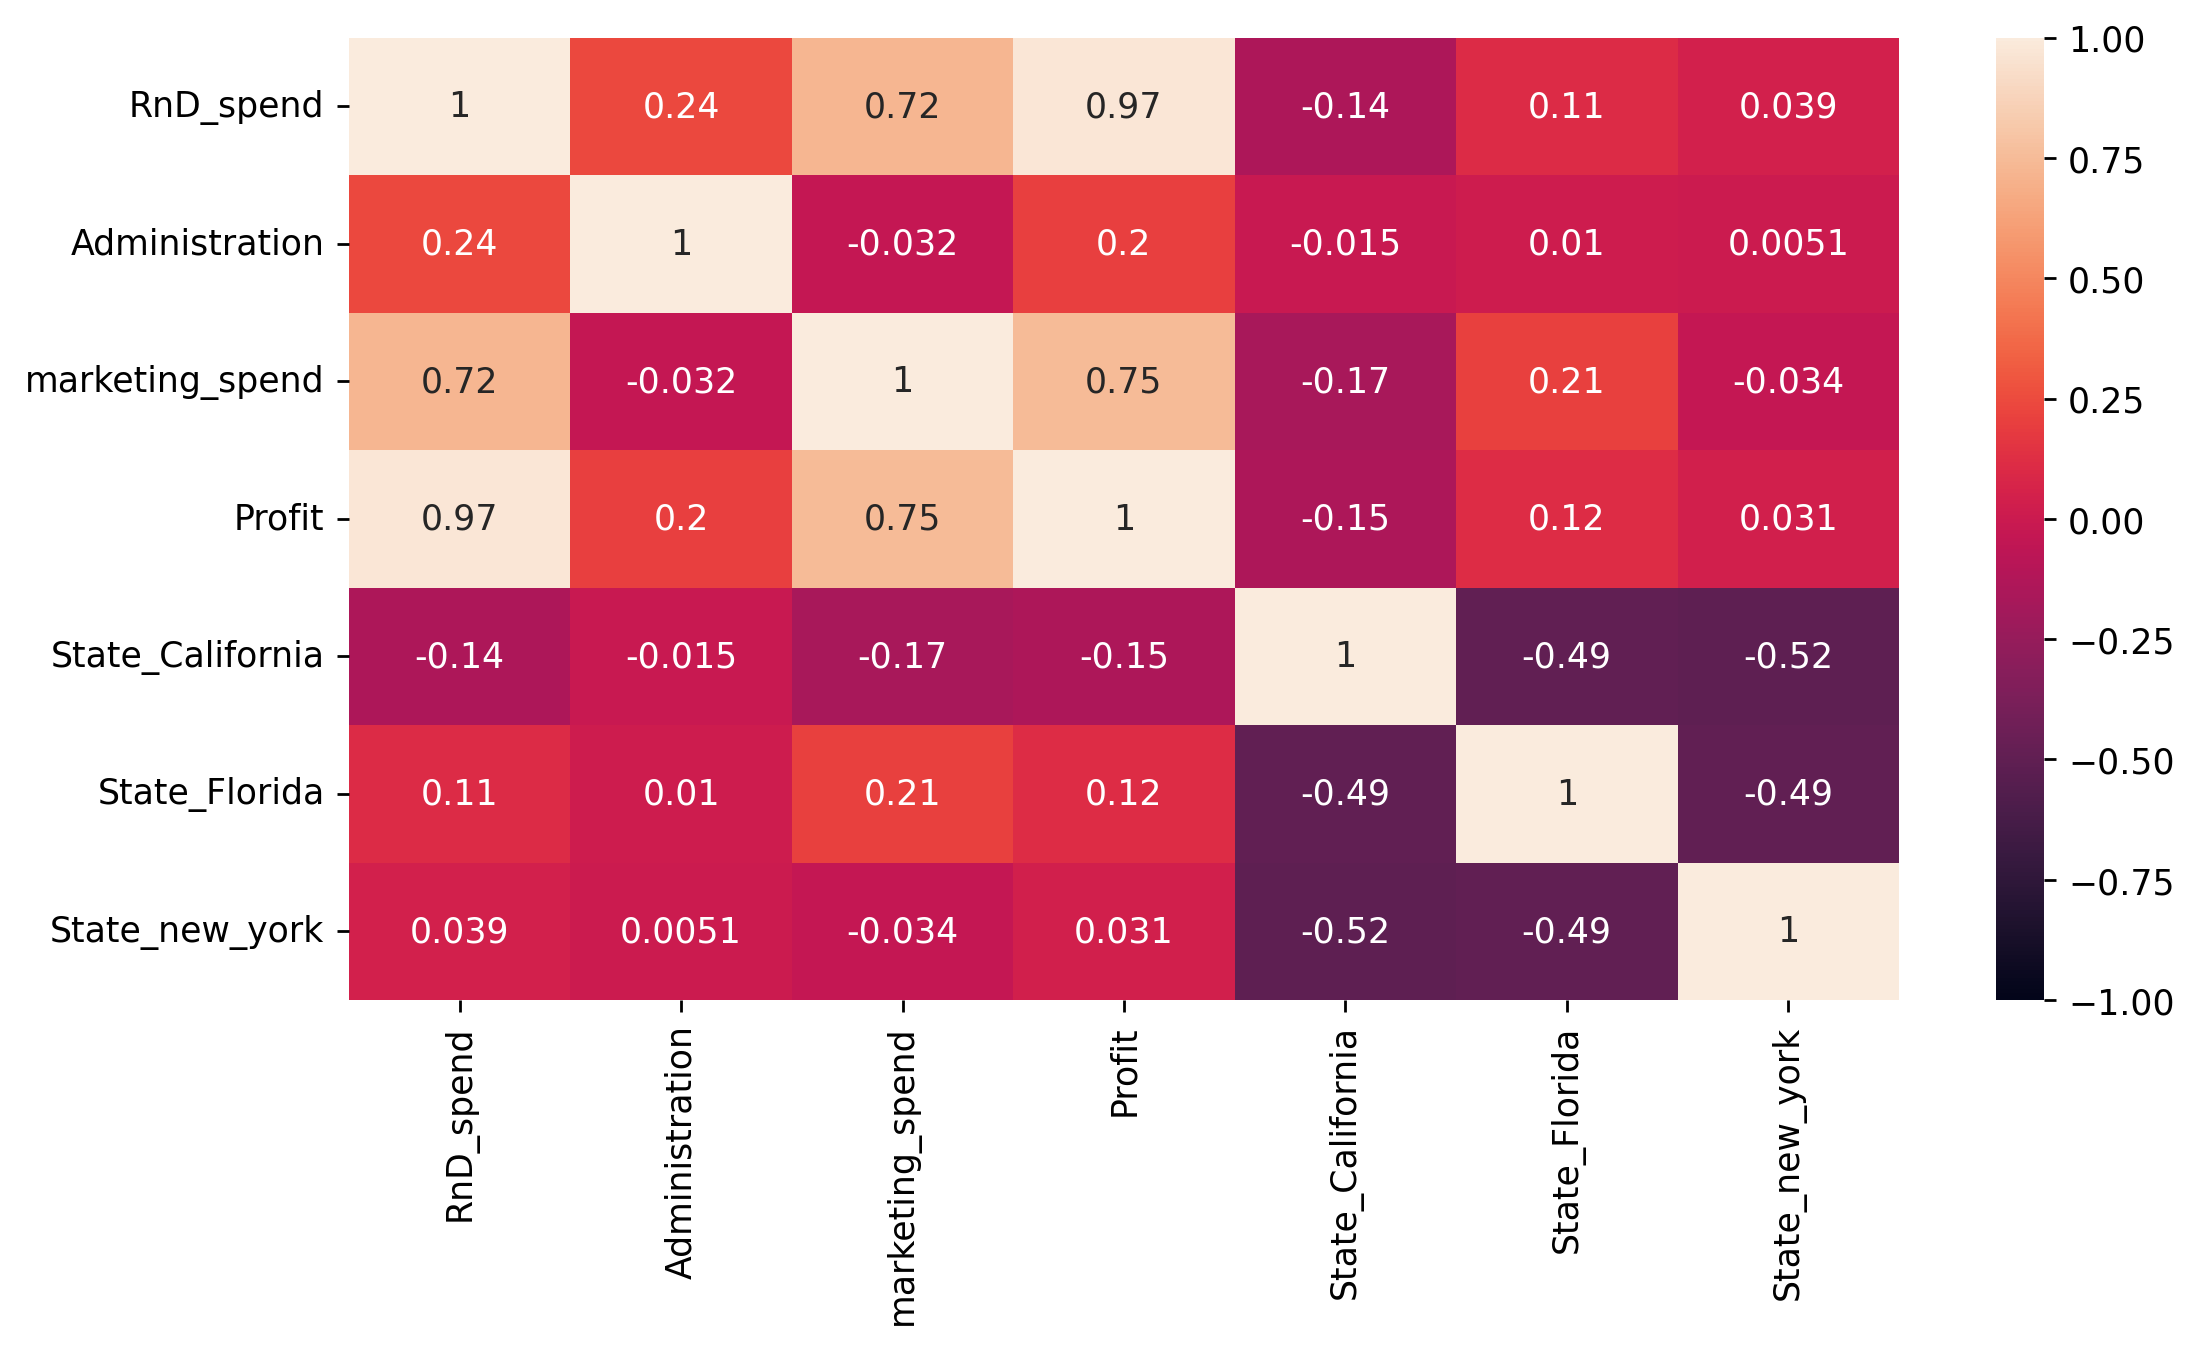

In [12]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

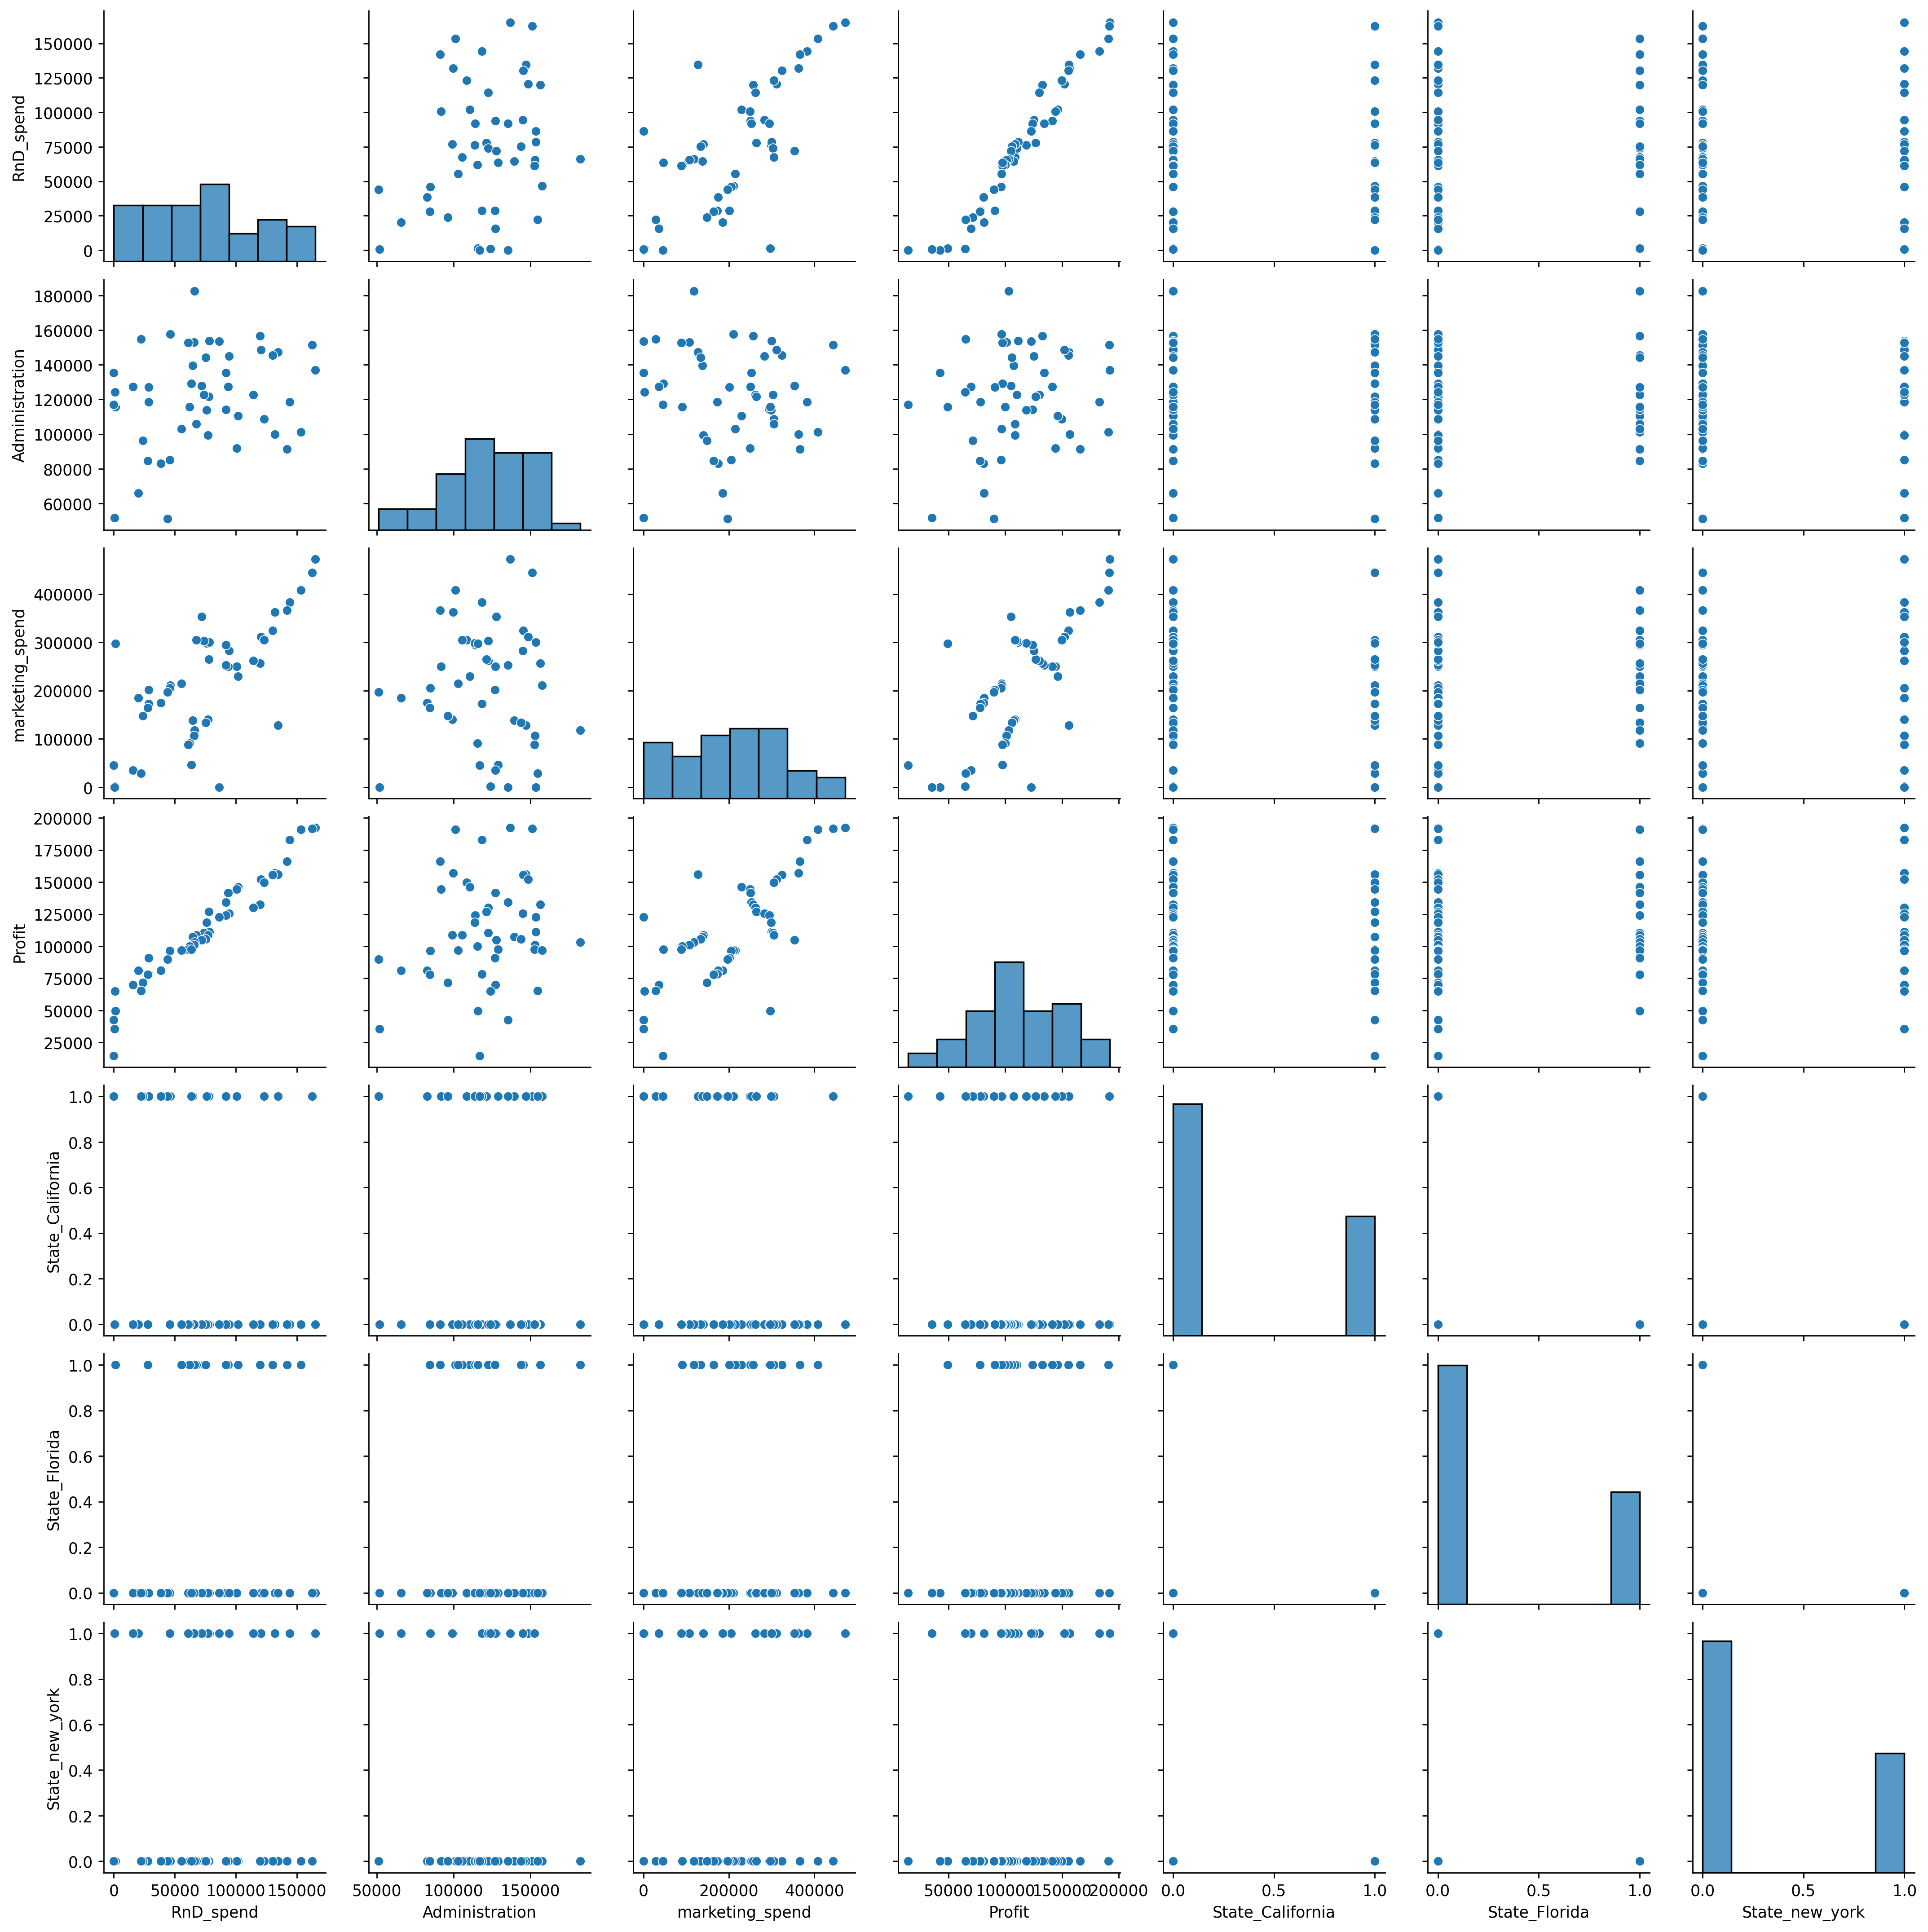

In [13]:
sns.pairplot(data)

# model Building

In [14]:
import statsmodels.formula.api as smf

In [15]:
data.columns


Index(['RnD_spend', 'Administration', 'marketing_spend', 'Profit',
       'State_California', 'State_Florida', 'State_new_york'],
      dtype='object')

In [16]:
model = smf.ols('Profit~RnD_spend +Administration+marketing_spend+State_California+State_Florida+State_new_york',data=data).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           1.34e-27
Time:                        16:50:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RnD_spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
marketing_spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_new_york    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.98e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
model.pvalues

Intercept           2.807645e-09
RnD_spend           2.578772e-21
Administration      6.077373e-01
marketing_spend     1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_new_york      9.409010e-06
dtype: float64

In [19]:
models = smf.ols('Profit~RnD_spend+Administration+marketing_spend',data=data).fit()

In [20]:
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           4.53e-30
Time:                        16:50:09   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
models.pvalues

Intercept          1.057379e-09
RnD_spend          2.634968e-22
Administration     6.017551e-01
marketing_spend    1.047168e-01
dtype: float64

In [22]:
models = smf.ols('Profit~RnD_spend+Administration',data=data).fit()

In [23]:
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           7.29e-31
Time:                        16:50:09   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RnD_spend          0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
models.pvalues

Intercept         5.695336e-12
RnD_spend         2.278348e-31
Administration    2.888932e-01
dtype: float64

In [25]:
models = smf.ols('Profit~RnD_spend',data=data).fit()

In [26]:
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           3.50e-32
Time:                        16:50:09   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD_spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
models.pvalues

Intercept    2.782697e-24
RnD_spend    3.500322e-32
dtype: float64

## Calculate VIF

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [29]:
vif['VIF']= [variance_inflation_factor(data.values,i)for i in range(len(data.columns))]

In [30]:
vif['columns']=data.columns

In [31]:
vif

,VIF,columns
0,19.604937,RnD_spend
1,1.184921,Administration
2,2.552858,marketing_spend
3,20.305593,Profit
4,19.939371,State_California
5,19.779492,State_Florida
6,20.100087,State_new_york


# Normality Test

In [32]:
import statsmodels.api as sm

In [33]:
model.resid

0      -128.741365
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782789
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825742
19     7182.671589
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396605
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518953
42      922.496288
43     9658.711782
44      615.182788
45    17337.715292
46    -6782.242679
47    -3908.502003
48   -13449.663082
49   -33503.638790
dtype: float64

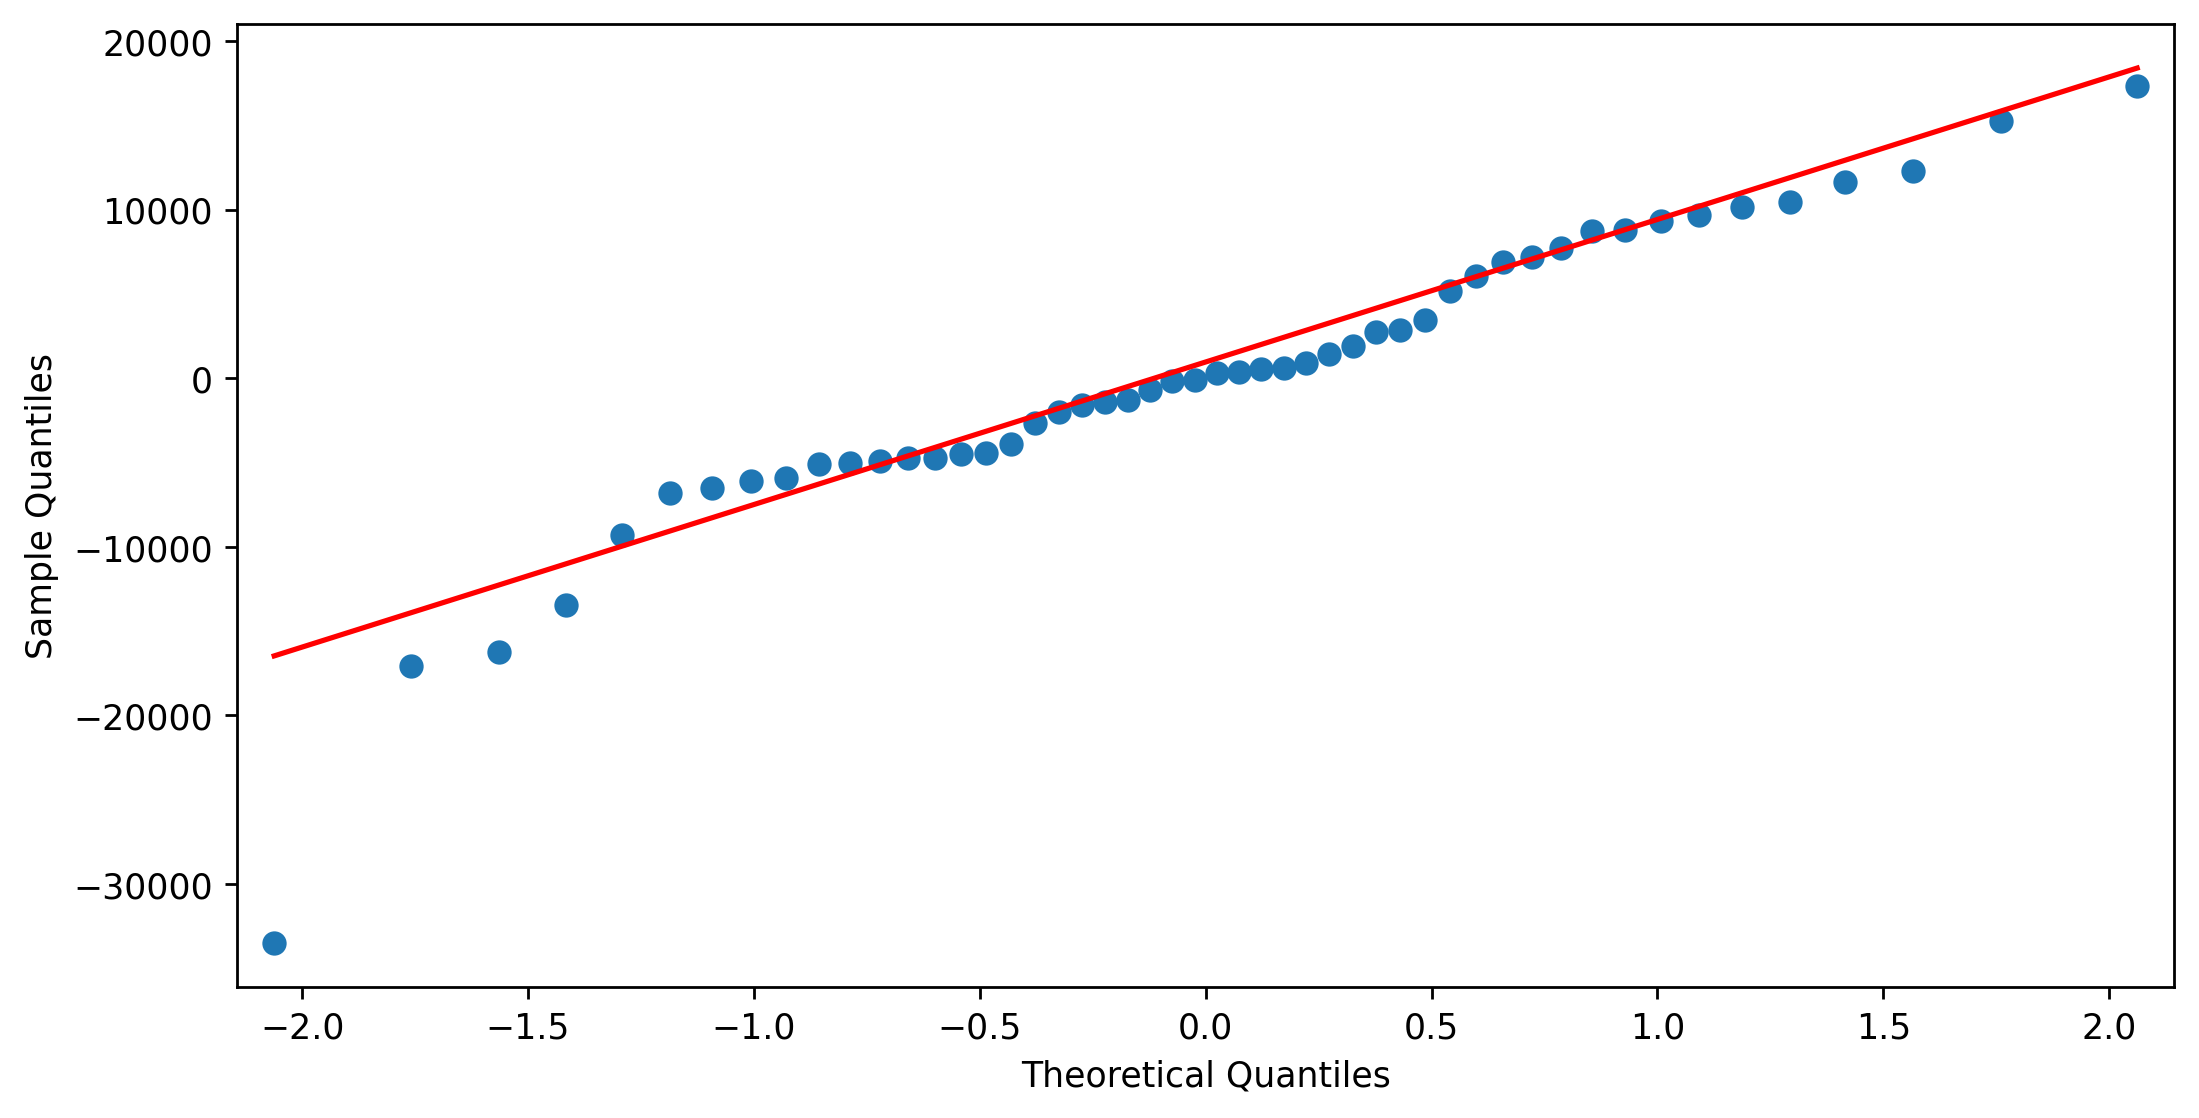

In [34]:
sm.qqplot(model.resid,line='q');

In [35]:
np.where(model.resid<-20000)

(array([49], dtype=int64),)

## Residual plot of Homoscedasticity

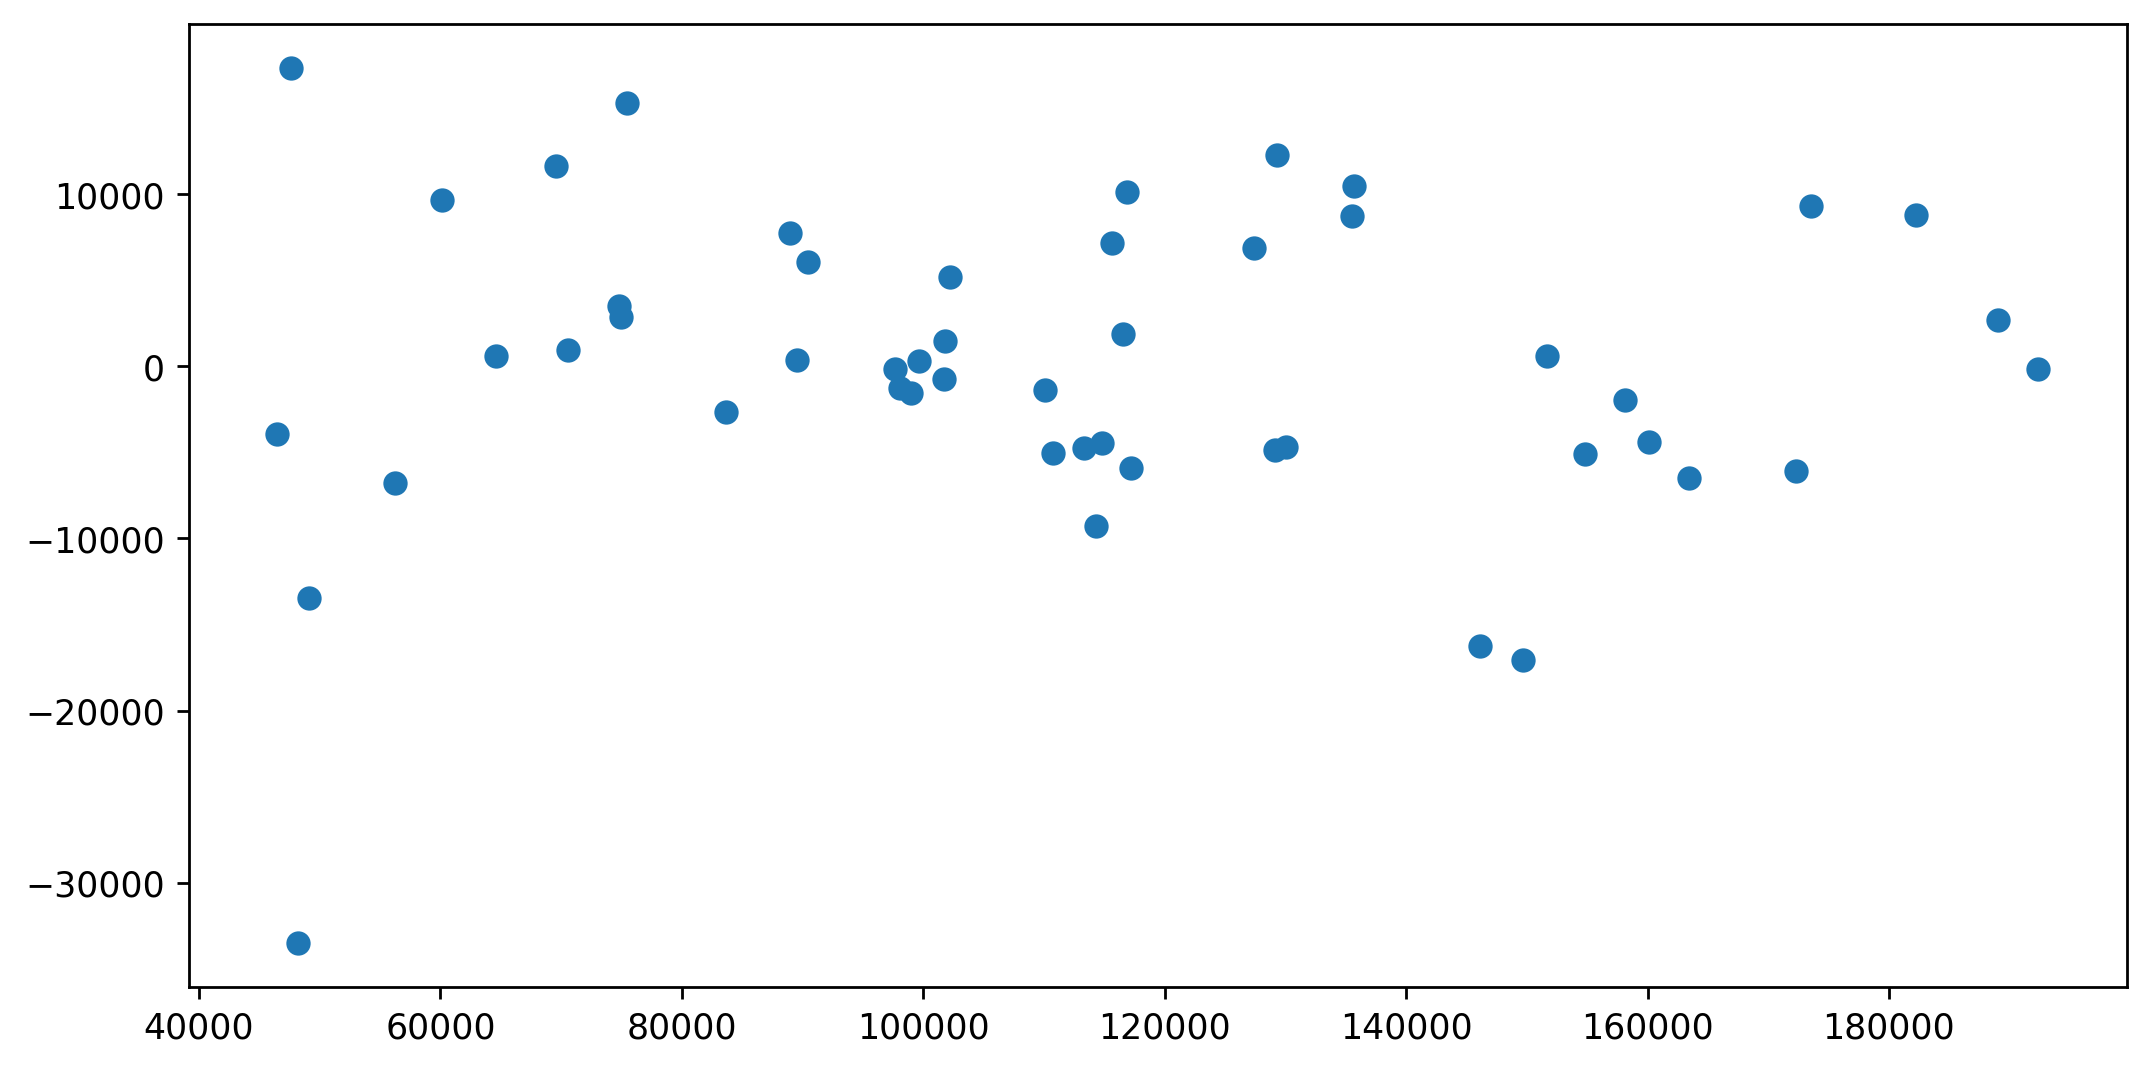

In [36]:
plt.scatter(model.fittedvalues,model.resid)

# Residual VS Regressor

eval_env: 1


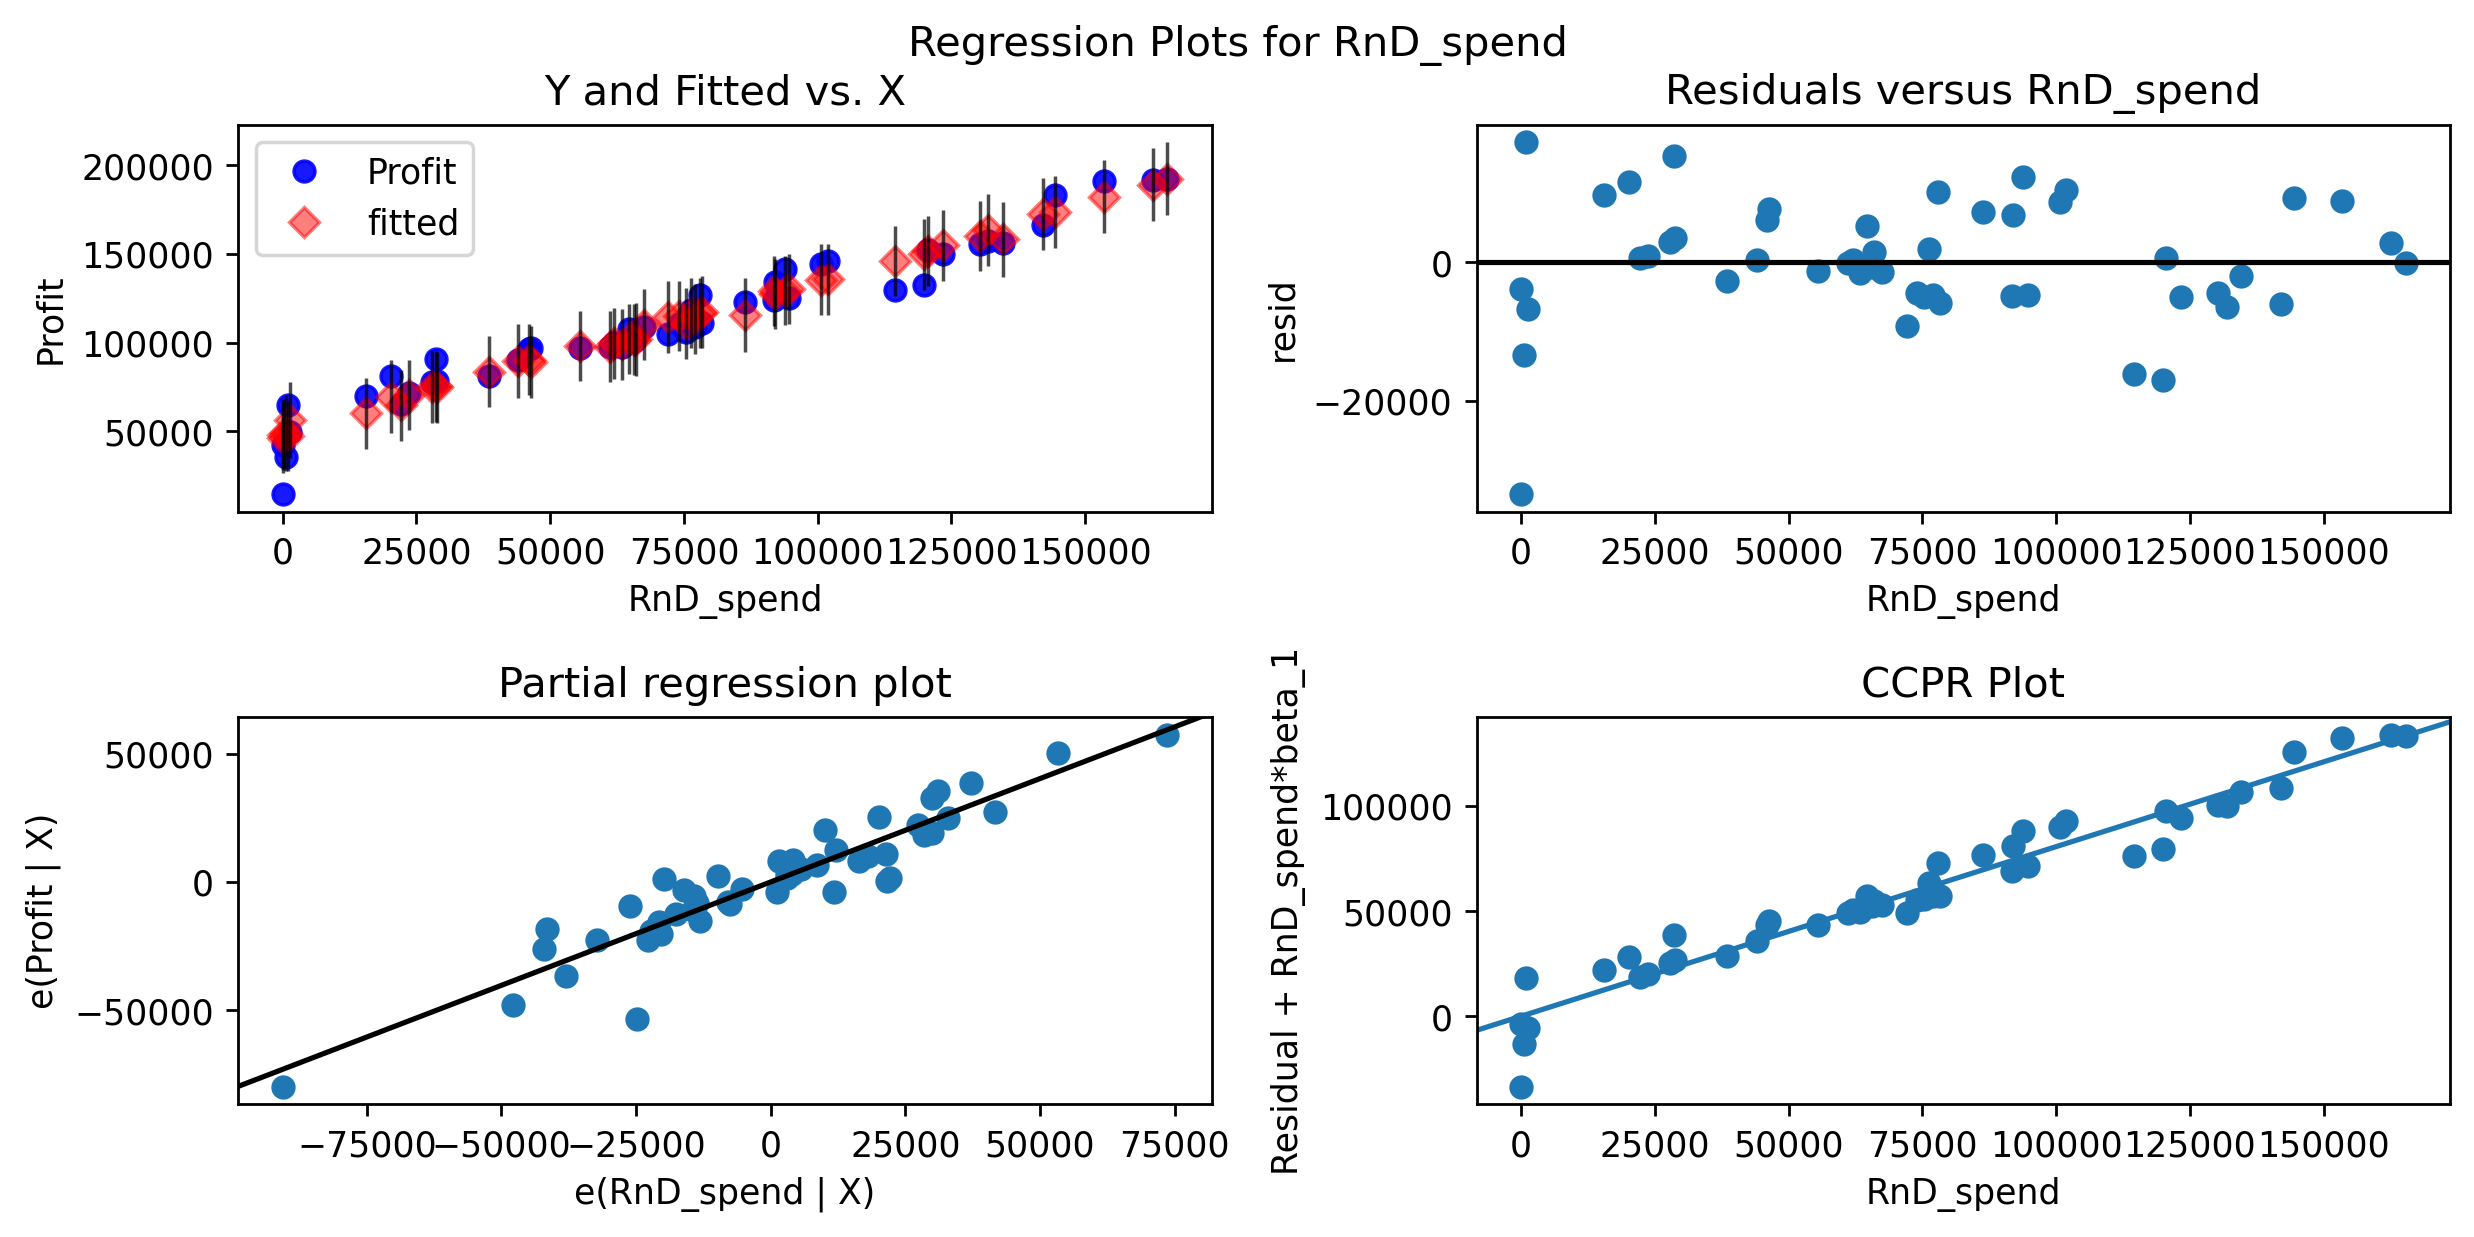

In [37]:
sm.graphics.plot_regress_exog(model,'RnD_spend');

eval_env: 1


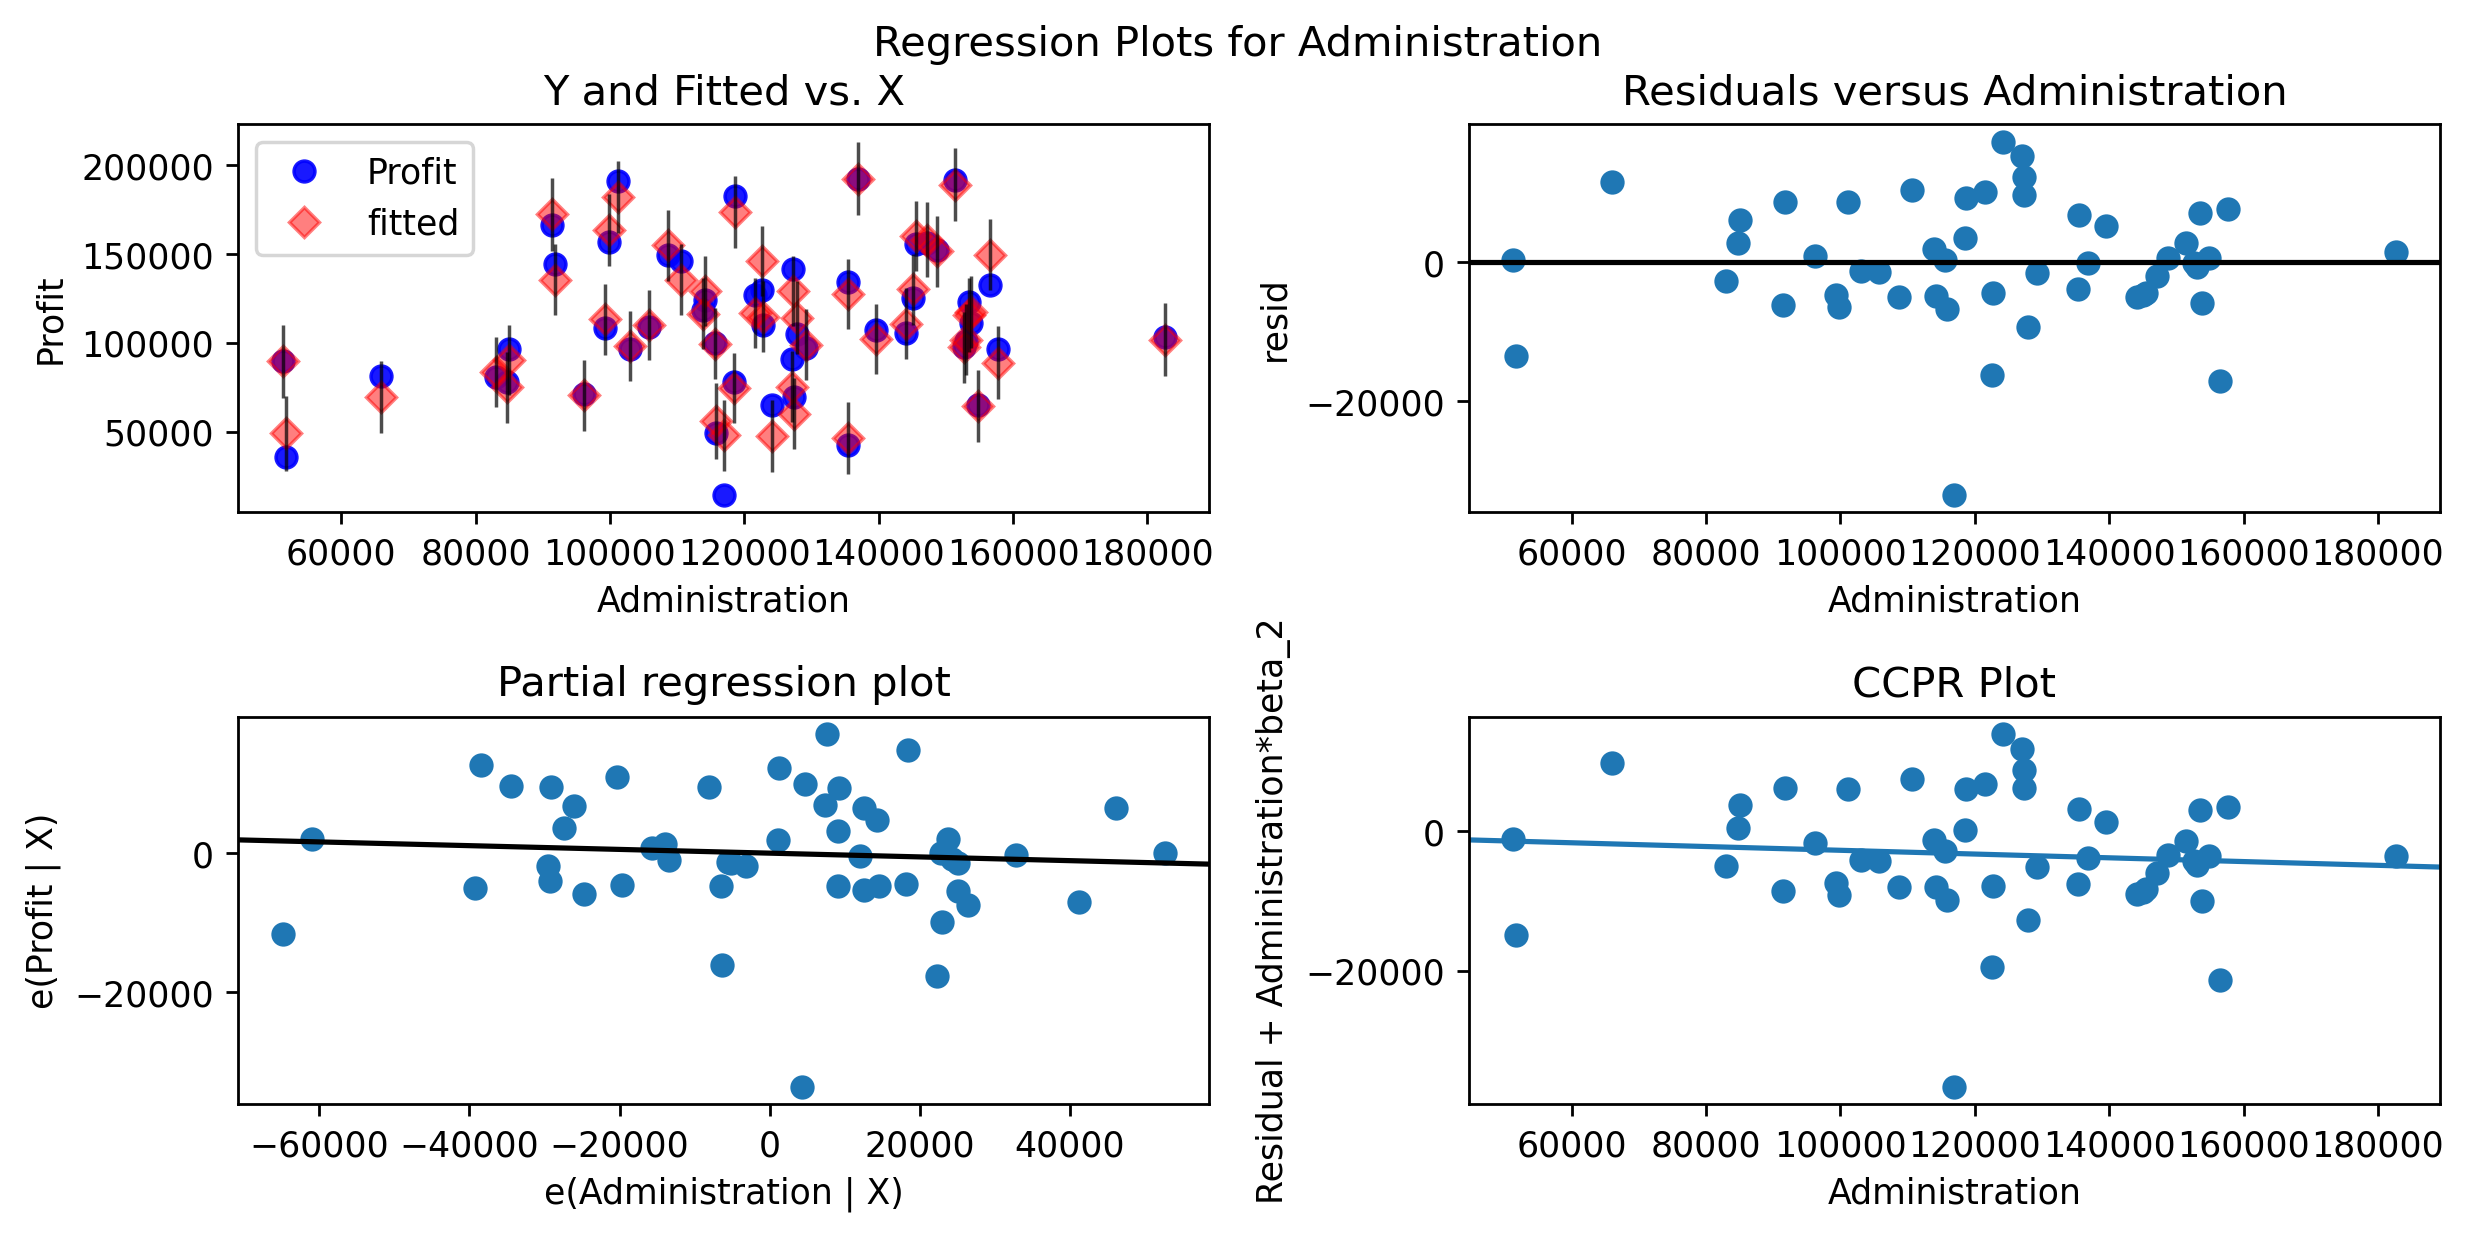

In [38]:
sm.graphics.plot_regress_exog(model,'Administration');

eval_env: 1


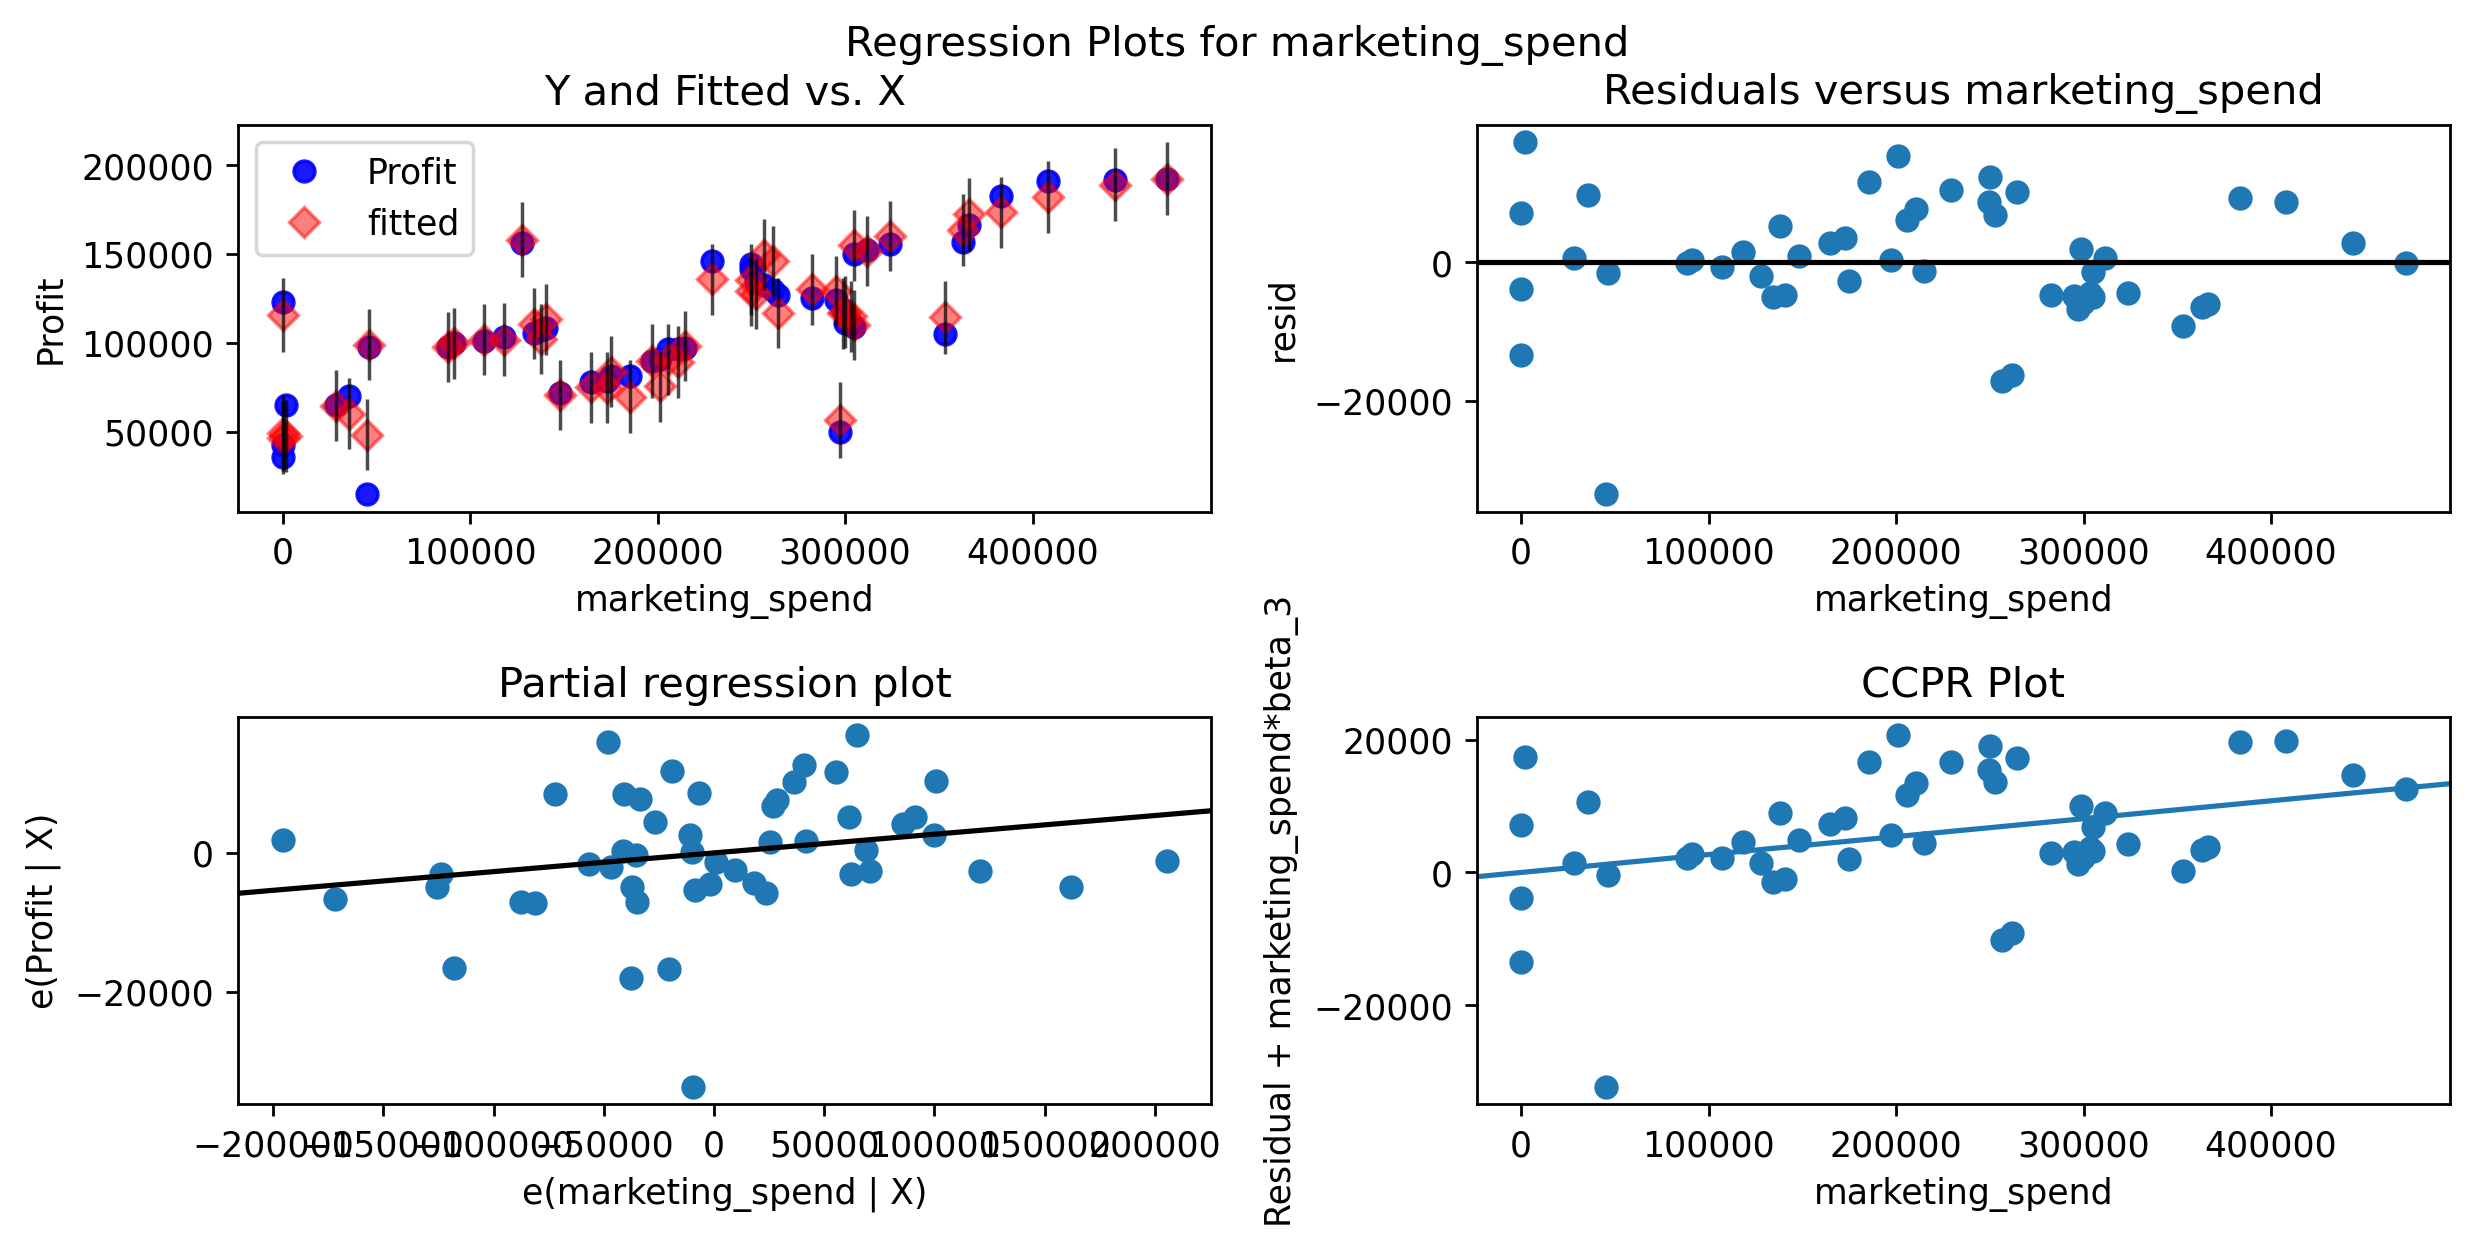

In [39]:
sm.graphics.plot_regress_exog(model,'marketing_spend');

# Model Deletion and Diagnostics

In [40]:
inf = model.get_influence()
c,p = inf.cooks_distance

In [41]:
c

array([6.58235386e-06, 3.39430615e-03, 2.39098625e-02, 2.02032949e-02,
       1.20198420e-02, 1.00370545e-02, 2.13697865e-03, 3.57036535e-03,
       6.25257579e-05, 5.41213370e-03, 1.89764313e-02, 1.65867572e-02,
       1.82797330e-02, 6.34364572e-03, 6.17285106e-02, 3.72134923e-02,
       1.35078103e-02, 3.71193311e-03, 2.94854637e-03, 2.81922632e-02,
       6.02783698e-04, 1.00287995e-02, 3.02178458e-03, 3.16115938e-04,
       4.34597714e-03, 3.56884817e-03, 4.96640589e-03, 2.78597505e-02,
       9.20897921e-04, 9.83021753e-05, 2.28936702e-05, 3.65145588e-06,
       5.61582965e-04, 2.31043413e-04, 1.79909587e-02, 7.13289876e-03,
       5.07832731e-02, 6.16526092e-05, 4.78300794e-02, 1.37854568e-03,
       1.94676476e-03, 1.88154422e-03, 1.42427115e-04, 2.00561912e-02,
       1.00026060e-04, 8.09098154e-02, 3.62771434e-02, 3.84131479e-03,
       1.34036686e-01, 2.26250945e-01])

<StemContainer object of 3 artists>

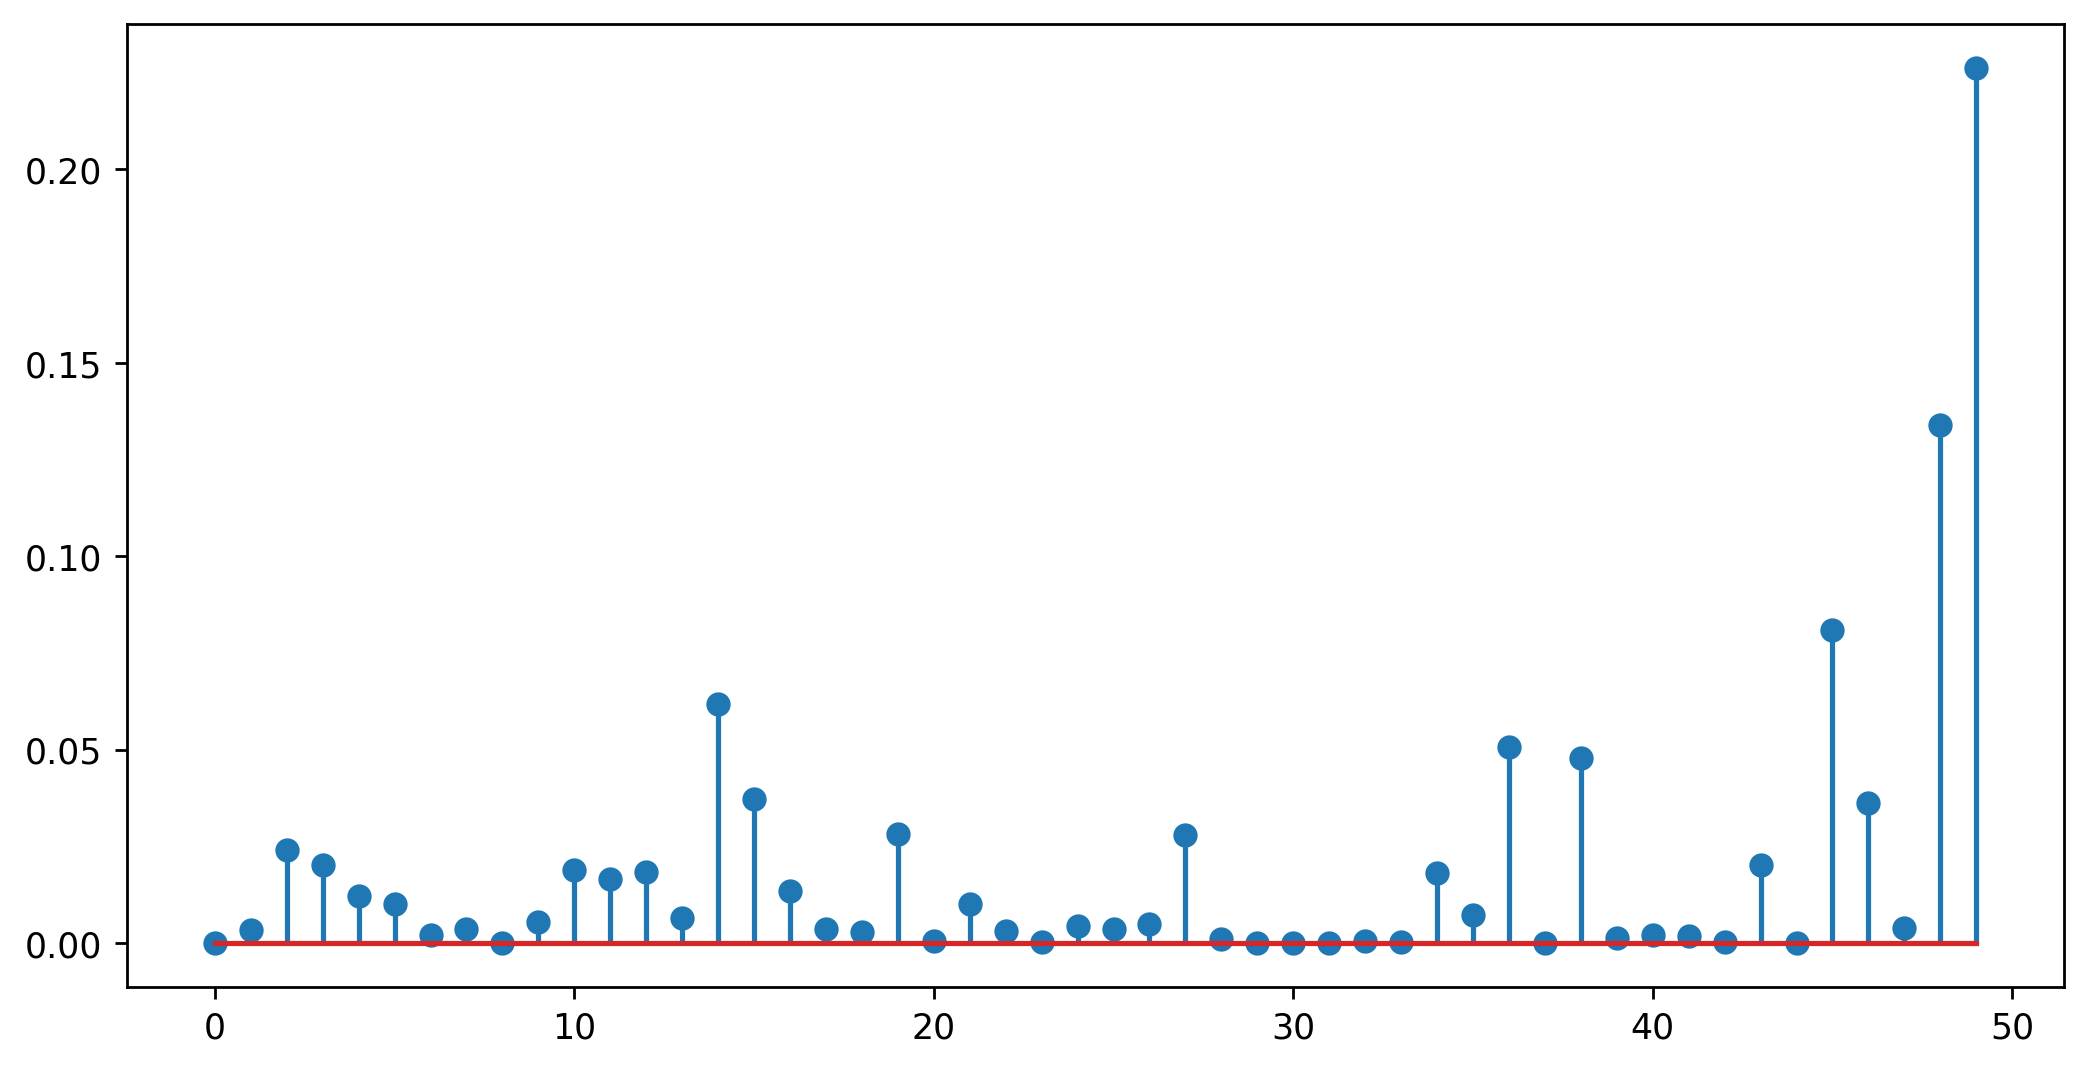

In [42]:
plt.stem(c)

In [43]:
np.argmax(c),np.min(c)

(49, 3.6514558849790614e-06)

In [44]:
data.iloc[[49]]

,RnD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_new_york
49,0.0,116983.8,45173.06,14681.4,1,0,0


In [45]:
data.head()

,RnD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_new_york
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [46]:
from statsmodels.graphics.regressionplots import influence_plot

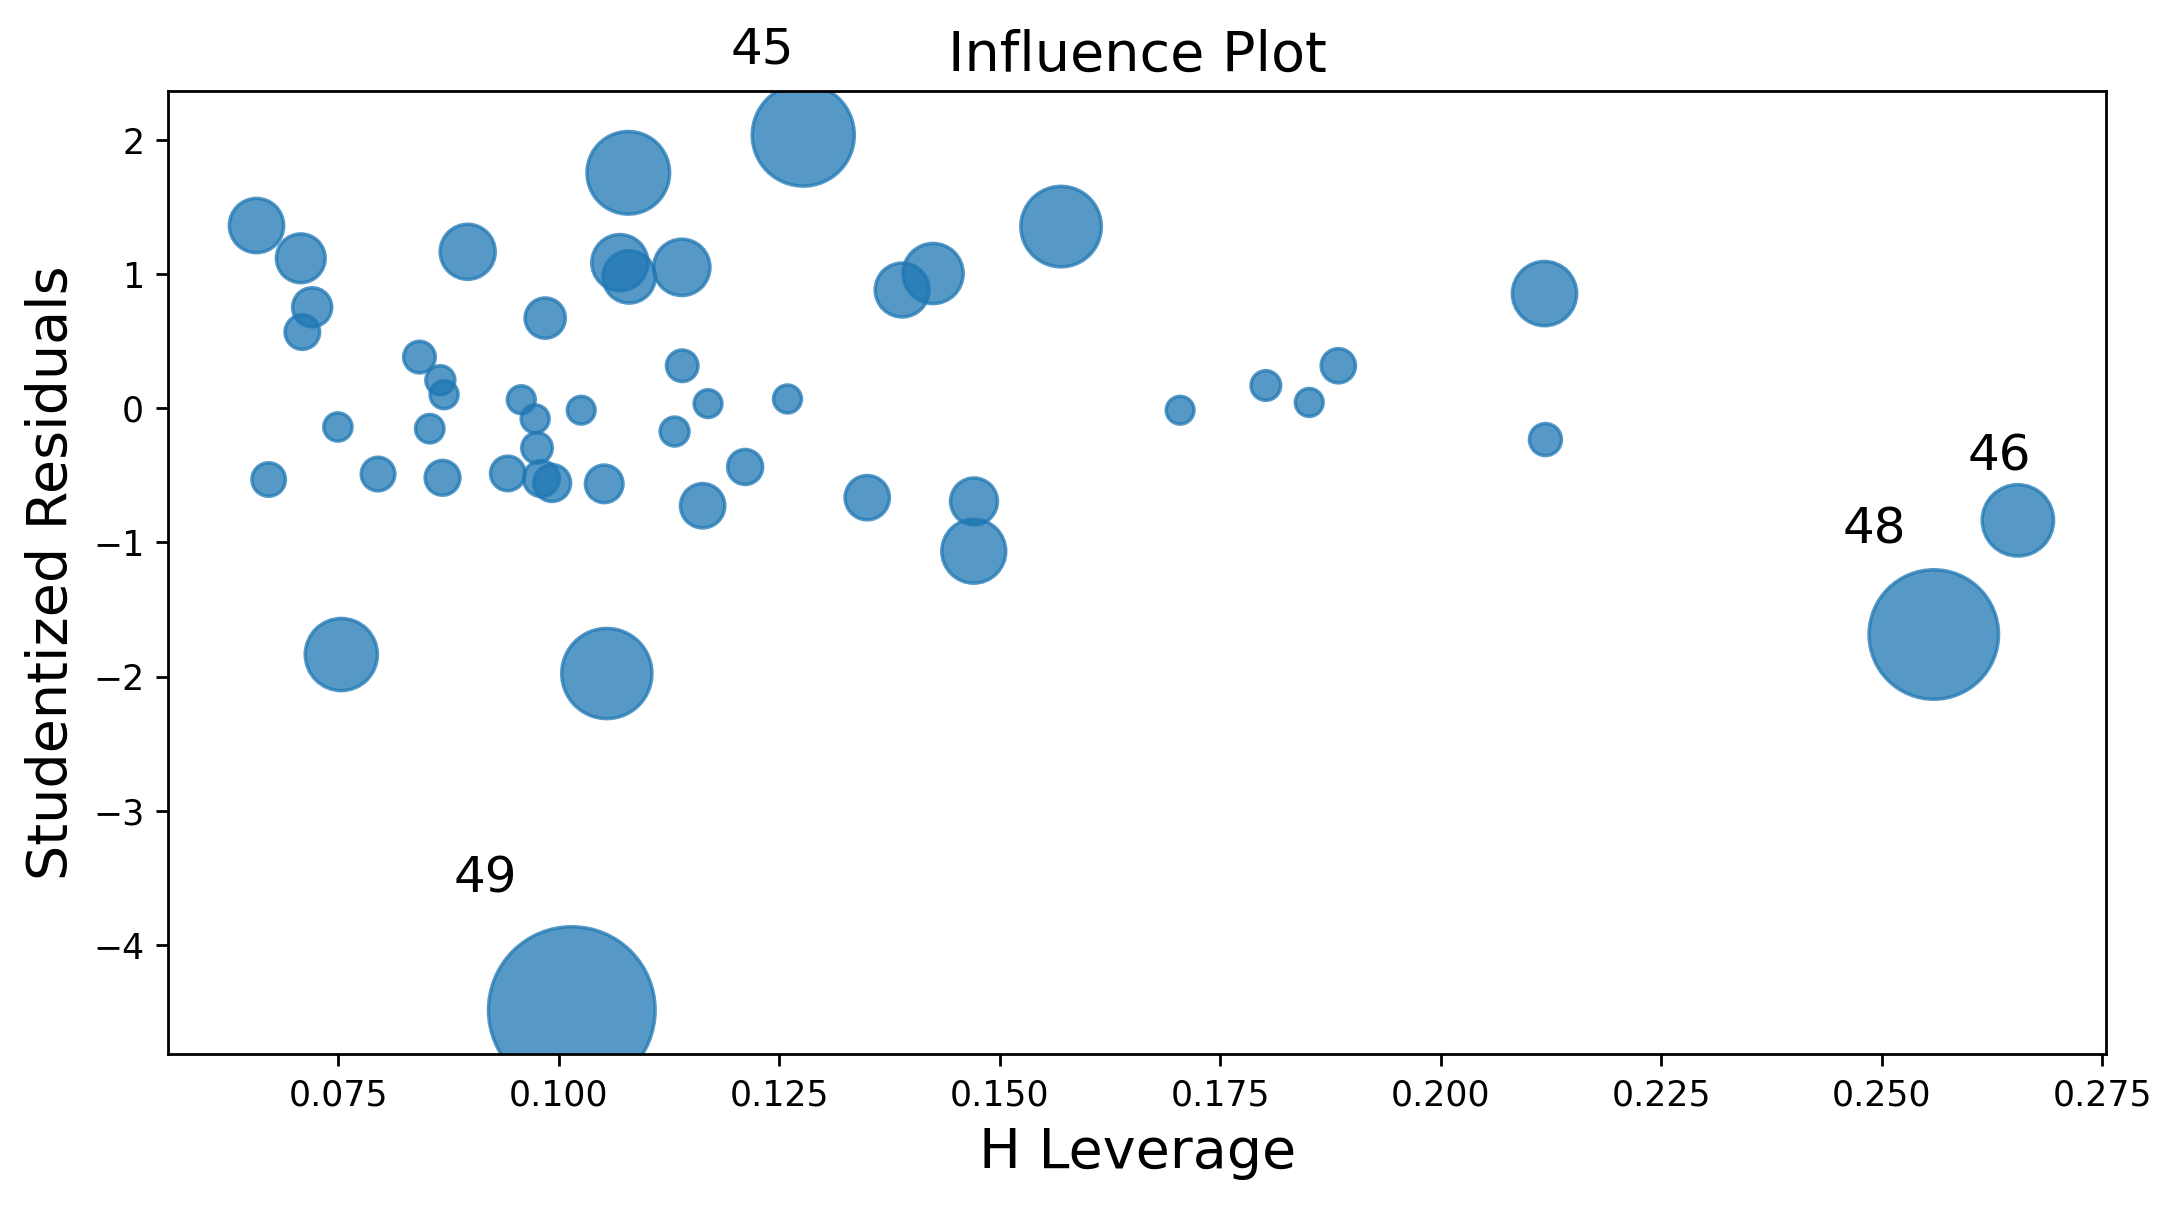

In [47]:
influence_plot(model);

In [48]:
#calculates_off
k = len(data.columns)
n = len(data)

In [49]:
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.48

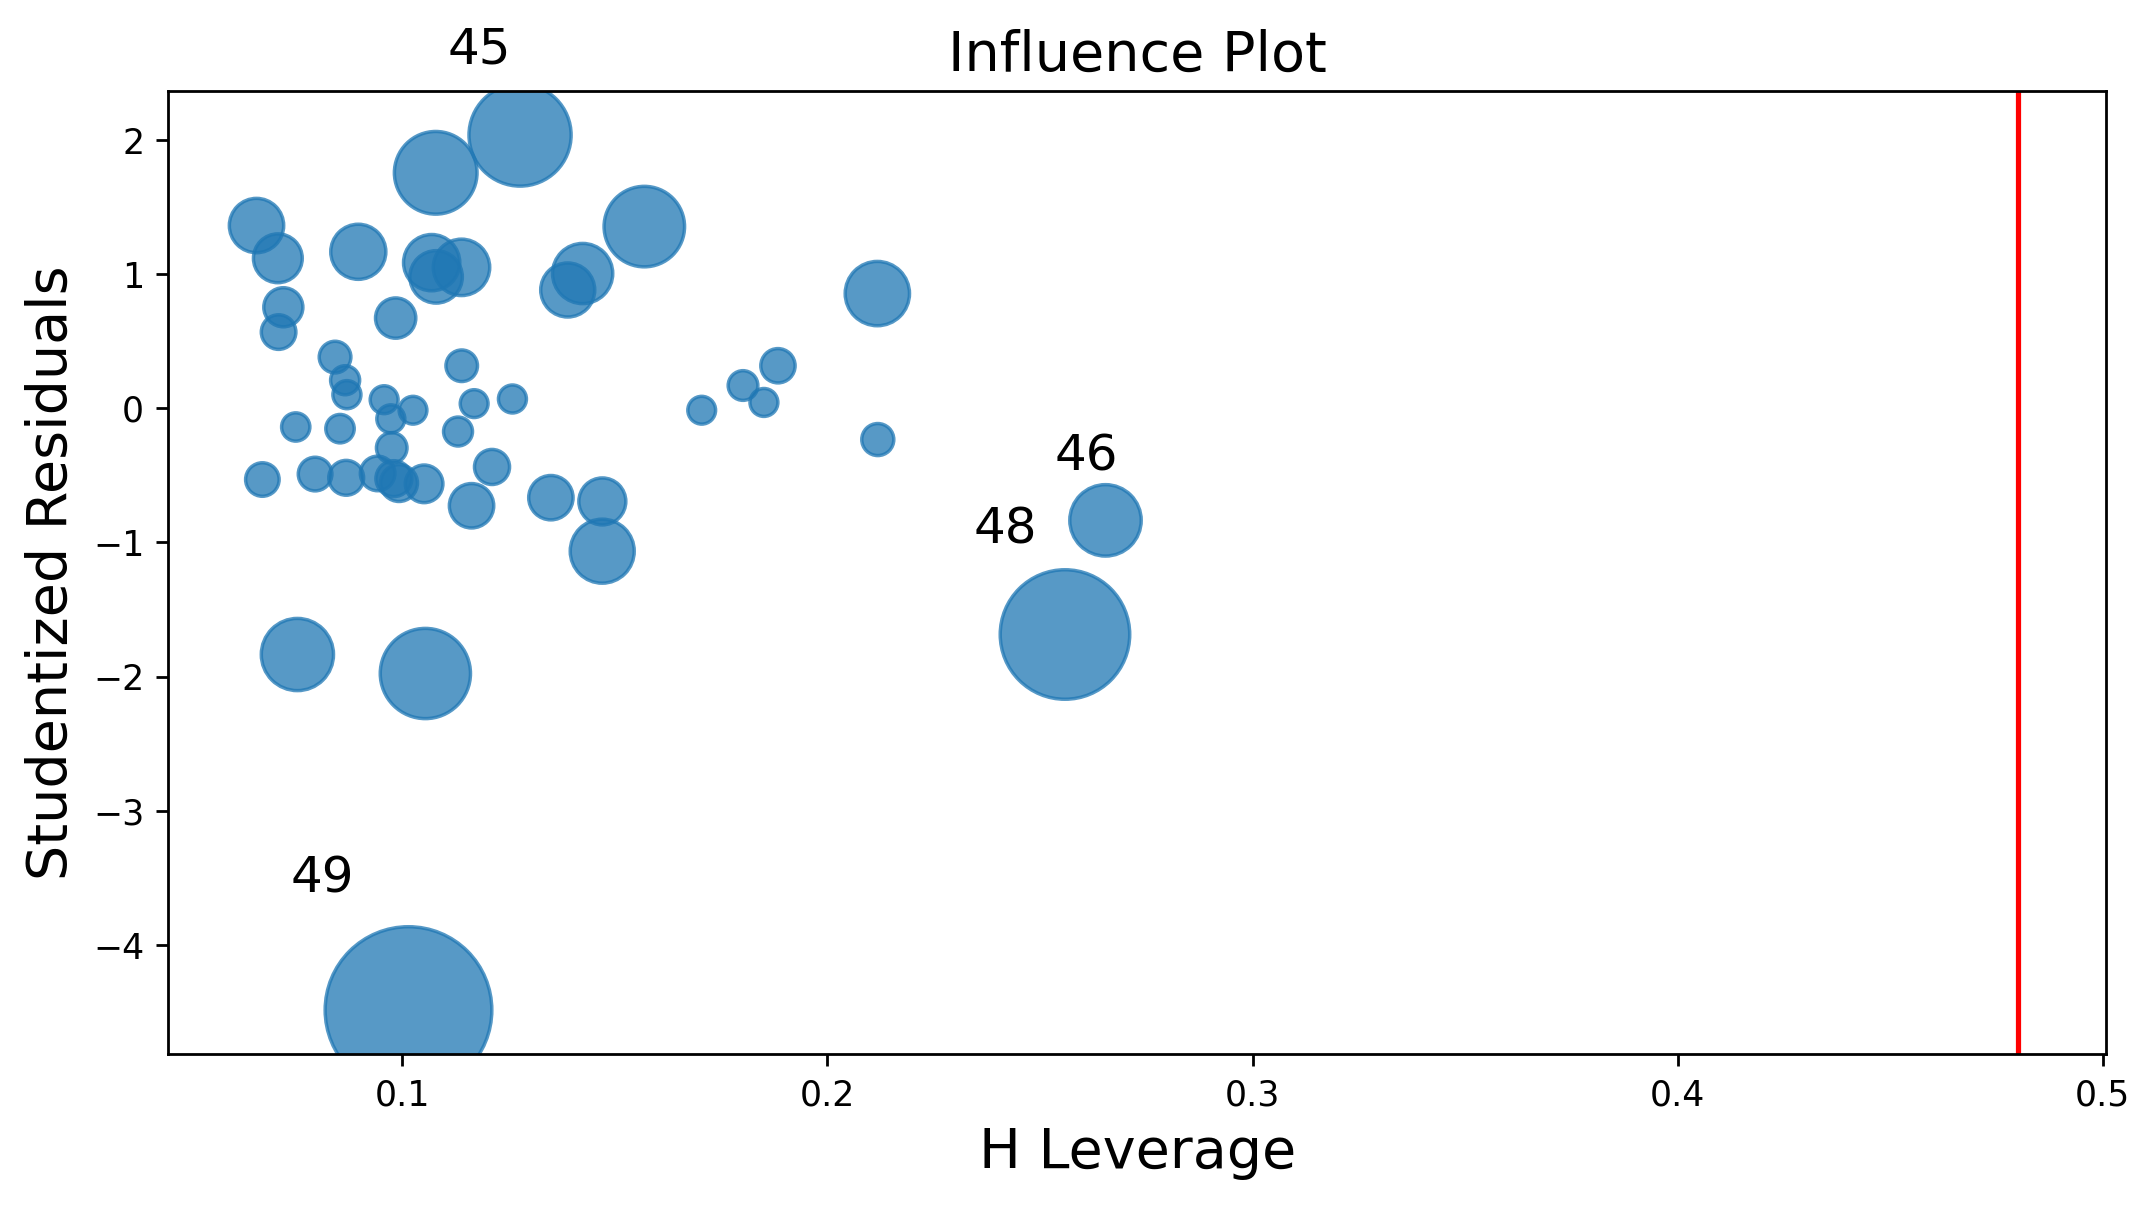

In [50]:
influence_plot(model)
plt.axvline(leverage_cutoff,color='red')

# Improving the Model

In [52]:
data.drop(index=[49],inplace=True)

In [53]:
data

,RnD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_new_york
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [54]:
data.reset_index(inplace=True)

In [55]:
data.head()

,index,RnD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_new_york
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [56]:
data.drop(columns=['index'],inplace=True)

In [58]:
model = smf.ols('Profit~RnD_spend +Administration+marketing_spend+State_California+State_Florida+State_new_york',data=data).fit()

In [59]:
inf = model.get_influence()
c,p = inf.cooks_distance

In [60]:
c

array([2.60457605e-03, 5.43611572e-03, 5.23635210e-02, 4.19973961e-02,
       9.28253204e-03, 8.54263313e-03, 6.15649426e-03, 2.94777096e-03,
       6.61625485e-04, 1.00106985e-02, 3.00216663e-02, 1.80966911e-02,
       2.74109701e-02, 5.58584271e-03, 8.16580856e-02, 4.79941101e-02,
       1.36540404e-02, 4.49466147e-03, 3.66606422e-03, 3.85763193e-02,
       4.76013414e-06, 1.43944528e-02, 4.51284502e-03, 5.56408037e-04,
       6.09035584e-03, 1.66340828e-03, 8.20130646e-03, 3.95477553e-02,
       2.87584982e-04, 4.13082585e-04, 2.37475576e-05, 1.70903058e-04,
       5.52206253e-03, 6.49964470e-04, 1.13338164e-02, 8.64860401e-03,
       6.23177043e-02, 2.44421552e-03, 5.76911886e-02, 8.19936250e-03,
       5.81863937e-05, 1.02900623e-03, 1.17662762e-03, 2.05607948e-02,
       3.46461151e-03, 9.43851946e-02, 8.24936996e-02, 2.51127784e-02,
       2.43528176e-01])

<StemContainer object of 3 artists>

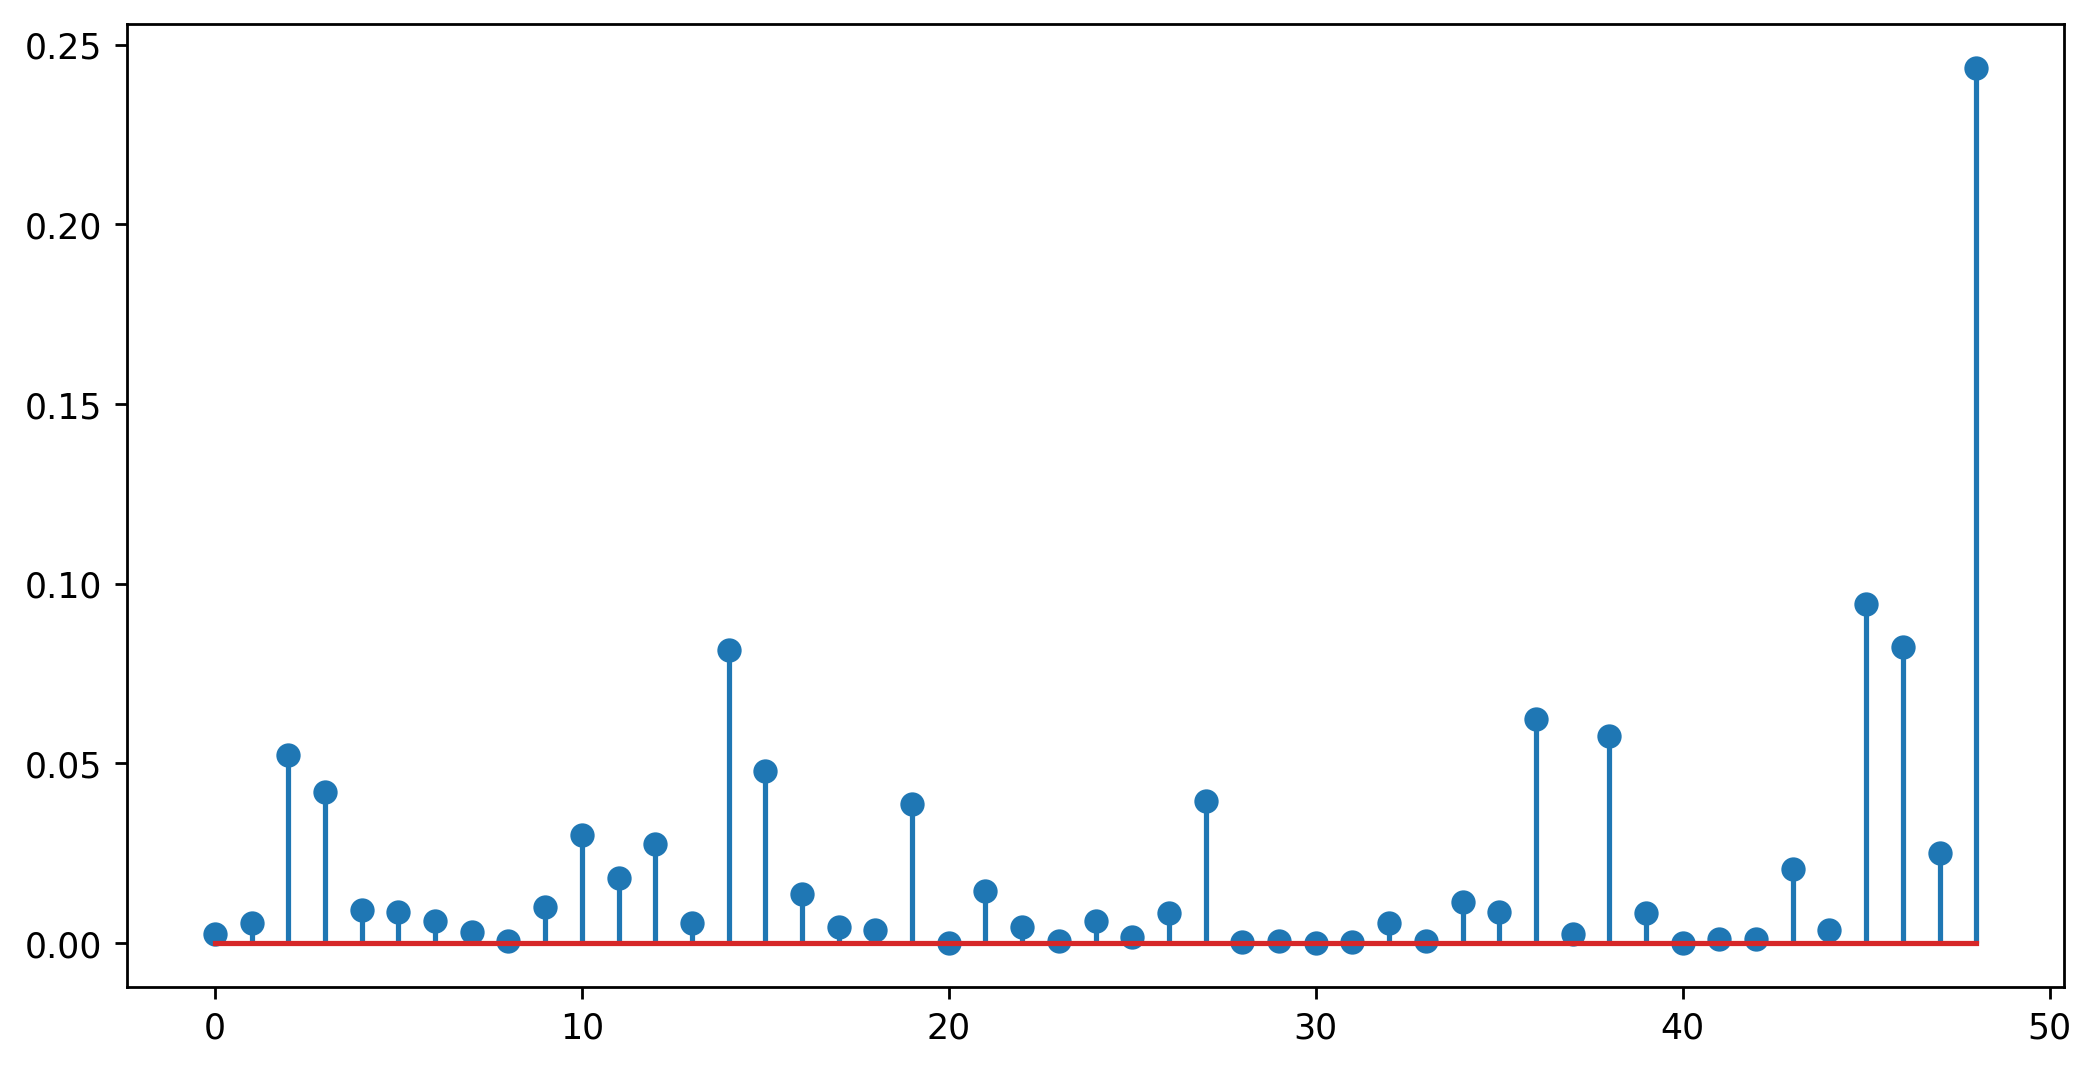

In [61]:
plt.stem(c)

In [62]:
np.argmax(c),np.max(c)

(48, 0.2435281757140357)

- Since the value  is <1, we can stop the diagnostic process anf finalize the model

## Model Prediction

In [65]:
data.head()

,RnD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_new_york
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [75]:
newdf = pd.DataFrame({
    'RnD_spend':[15247],
    'Administration':[136897],
    'marketing_spend':[47173],
    'State_California':[1] ,   
    'State_Florida':[0],
    'State_new_york':[0]
})

In [76]:
model.predict(newdf)

0    63529.873888
dtype: float64